# Clanking all the genes with the quartile method

In [32]:
q3 = allGenes[allGenes < allGenes.quantile(0.35)]
q4 = allGenes[allGenes > allGenes.quantile(0.65)]
ranking = q3.mean() + q4.mean()

In [3]:
q3 = allGenes[allGenes < allGenes.quantile(0.35)]
q4 = allGenes[allGenes > allGenes.quantile(0.65)]

In [7]:
q3.hist() 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa31776ea60> (for post_execute):


KeyboardInterrupt: 

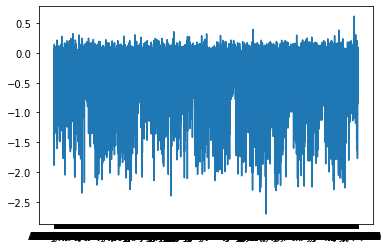

In [9]:
plt.plot(q3.mean())

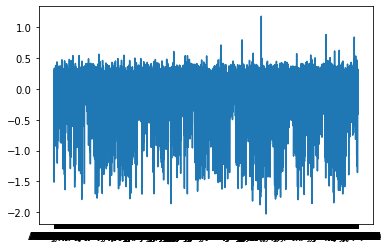

In [11]:
plt.plot(q4.mean())

In [12]:
rankings = {}
for _ in range(len(ranking.index)):
    if ranking[ranking.index[_]] > 0:
        rankings[ranking.index[_]] = allGenes[ranking.index[_]].sort_values(ascending=False)
    else:
        rankings[ranking.index[_]] = allGenes[ranking.index[_]].sort_values()

In [87]:
# according to sanger:
rankings_correct = {
 'CDK4': '-',     
 'RB1': '+',         'CDKN2C': '+',
 'CCND1': '-',       'CDK6': '-',
 'CCND3': '-',       'CCNE1': '-',
 'CDKN2A': '+',      'CDKN2B': '+',
 'NF2': '+',         'PTPN14': '+',
 'KIRREL1': '-',     'AMOTL2': '-',
 'LATS2': '+',       'TAOK1': '+',
 'PTEN': '+',        'CRK': '-',
 'RAC1': '-',        'ABL2': '-',
 'DLG5': '-',        'PKN2': '-'   }

In [347]:
# ranking['CDKN2A'] = 0.1 , manuell geaendert

In [ ]:
## part of clank visualization is of course the clustermap, but there is also
   the -log(p) plot, comparing to random pairs.

# KEEP IN MIND THAT NOT ALL GENES MIGHT BE CORRECTLY RANKED, WE HAVE TO VALIDATE FOR OUR SELECTION

In [134]:
a = set(cdk46low)
b = set(top_ce['CDK4_CDK6'][0:220])
b.intersection(a)

{'C32', 'HEL9217', 'KMM1', 'NCIH1573', 'RCC10RGB', 'RPMI8226', 'SNU308'}

# wir brauchen 220 Zelllinien um alle 7 linien die cdk4 und cdk6 von weniger als -1 haben zu inkludieren.

In [164]:
def total_occurence(x):
    temp = data[data['primary_disease'] == x]
    return temp.shape[0]

In [453]:
new_data = data[data.stripped_cell_line_name.isin(allGenes.index)]
new_data.shape
data = new_data

In [ ]:
# ueberpruefung nf2

In [334]:
nf2 = allGenes['NF2'].sort_values(ascending=False)

In [335]:
nf2_list = nf2.index.to_list()[0:35]

In [336]:
result_nf2 = get_prd(nf2_list)

In [338]:
result_nf2['primary_disease'].sort_values()

1446              Bile Duct Cancer
1294              Bile Duct Cancer
208               Bile Duct Cancer
1426              Bile Duct Cancer
1239                Bladder Cancer
721                 Bladder Cancer
501                   Brain Cancer
468                   Brain Cancer
35                    Brain Cancer
97                    Brain Cancer
243                   Brain Cancer
932        Colon/Colorectal Cancer
285        Colon/Colorectal Cancer
985     Endometrial/Uterine Cancer
343                 Gastric Cancer
500           Head and Neck Cancer
627           Head and Neck Cancer
261                  Kidney Cancer
904                  Kidney Cancer
681                  Kidney Cancer
823                    Lung Cancer
394                    Lung Cancer
678                    Lung Cancer
518                    Lung Cancer
1181                 Neuroblastoma
882                 Ovarian Cancer
1032                Ovarian Cancer
1204                Ovarian Cancer
685                 

In [346]:
get_hypergeometric_p_value(4,764,total_occurence('Neuroblastoma'),36)

0.00971120087611825

In [352]:
sang[sang['Gene Symbol'] == 'NF2']['Role in Cancer']

444    TSG
Name: Role in Cancer, dtype: object

# rankings for our pairs!

In [20]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CDKN2A'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

UL2 = [i for j in uli_list for i in j]
UL2 = set(UL2)
UL2 = list(UL2)

In [61]:
uli_list_individual = ['CDK4','RB1','CDKN2C','CCND1','CDK6','CCND3','CCNE1',
'CDKN2A','CDKN2B','NF2','AMOTL2','KIRREL1','TAOK1','LATS2','PTPN14','PTEN','ABL2','RAC1','CRK','DLG5','PKN2']

# RANDOM PAIRS TO VALIDATE NETWORK PRIORS

In [ ]:
# another idea is to explore a single gene and its connections to various diseases based on this approach.
#cdk4_pairs = []
#for _ in range(200):
  #  cdk4_pairs.append(['CDK4', random.choice(random_list)])

In [632]:
import random
random_list = [random.choice(allGenes.columns) for x in range(1800)]

In [633]:
random_pairs = []
for _ in range(40):
    random_pairs.append([random.choice(random_list), random.choice(random_list)])

In [7]:
# define clank70, also have clank 35 be a function
def clank70(list_of_pairs):
    top_ce = {}
    for _ in list_of_pairs:
        a,b = _
        a_list = rankings[a].index.to_list()
        a_df = pd.DataFrame(a_list)

        b_list = rankings[b].index.to_list()
        b_df = pd.DataFrame(b_list)

        ranked_index = pd.concat([a_df,b_df]).sort_index().reset_index(drop=True)
        top_ce[a + '_' + b] = ranked_index[0].to_list()[0:70]
    return top_ce

In [634]:
random_df = print_PRIMARY_DISEASES(clank70(random_pairs),70)

ARL6IP5_EFEMP1
Bone Cancer
7.6098372677751e-05


TCEAL5_TMEM145


LILRB3_ATP1B1
Lymphoma
0.035609602738929214
Rhabdoid
0.005731486973824262


GSTA2_ATP5IF1
Skin Cancer
0.01119527282122772


CLCC1_LRRC72
Lymphoma
0.0016513440636849043


MAPK13_LDHAL6B
Lymphoma
0.035609602738929214


AGK_H2AFJ
Leukemia
2.4108080682516166e-05
Bone Cancer
0.03538484245000727
Lymphoma
0.035609602738929214


TM7SF3_FAM160A1
Colon/Colorectal Cancer
0.04403821279944405


ESS2_VPS33B
Breast Cancer
0.0022009460367995452
Gallbladder Cancer
0.023378288987235485


ARSE_PAFAH2
Lymphoma
0.035609602738929214


CAMKK2_RAB20
Leukemia
0.008638717677791043


SPP2_SIK3


TPD52L3_RPS9
Lymphoma
0.0016513440636849043


FCGR2B_RECQL
Myeloma
0.029168556412179015
Kidney Cancer
0.042870121906064255
Gallbladder Cancer
0.023378288987235485


DUS1L_RECQL


PID1_ERVV-2


SLC35A3_SPTBN1


GARS_NXPE3


FRG1_CT55
Skin Cancer
0.03120870605596447


EN2_CENPN
Skin Cancer
0.03120870605596447


NKAP_SELPLG
Neuroblastoma
0.023522443343404056


In [607]:
random_df

{0: ['BRIP1_GH1', 'Leukemia', 0.008327493661142688],
 1: ['CYP4F11_EPN1', 'Leukemia', 0.008327493661142688],
 2: ['CYP4F11_EPN1', 'Prostate Cancer', 0.04581151832457946],
 3: ['PBOV1_TEX9', 'Leukemia', 0.008327493661142688],
 4: ['ACOX3_C6orf203', 'Colon/Colorectal Cancer', 0.0008721972675665855],
 5: ['ZNF668_RAMP1', 'Prostate Cancer', 0.04581151832457946],
 6: ['FIGNL1_RAB40B', 'Leukemia', 0.03401232901575299],
 7: ['FIGNL1_RAB40B', 'Neuroblastoma', 0.001102858671815676],
 8: ['FIGNL1_RAB40B', 'Sarcoma', 0.017567681356325214],
 9: ['YBX3_GLYATL3', 'Leukemia', 0.03401232901575299],
 10: ['MFSD5_ATRAID', 'Brain Cancer', 0.04545312870249513],
 11: ['MFSD5_ATRAID', 'Liposarcoma', 0.01870105550732919],
 12: ['LIN9_ACSL5', 'Prostate Cancer', 0.04581151832457946],
 13: ['TSPAN31_XKR9', 'Skin Cancer', 0.005469142146211375],
 14: ['TFAP2D_ALAS1', 'Leukemia', 0.0016657208025991467],
 15: ['HIST1H2AD_KNSTRN', 'Bladder Cancer', 0.038697809420019005],
 16: ['HIST1H2AD_KNSTRN', 'Prostate Cancer', 

In [636]:
random_df = pd.DataFrame(random_df)
random_df = random_df.transpose()
random_df

,0,1,2
0,ARL6IP5_EFEMP1,Bone Cancer,7.60984e-05
1,LILRB3_ATP1B1,Lymphoma,0.0356096
2,LILRB3_ATP1B1,Rhabdoid,0.00573149
3,GSTA2_ATP5IF1,Skin Cancer,0.0111953
4,CLCC1_LRRC72,Lymphoma,0.00165134
5,MAPK13_LDHAL6B,Lymphoma,0.0356096
6,AGK_H2AFJ,Leukemia,2.41081e-05
7,AGK_H2AFJ,Bone Cancer,0.0353848
8,AGK_H2AFJ,Lymphoma,0.0356096
9,TM7SF3_FAM160A1,Colon/Colorectal Cancer,0.0440382


In [637]:
random_df = pd.DataFrame(random_df)
random_df = random_df.transpose()
random_df
random_corres = []
alist = random_df[0].to_list()

for _ in alist:
    a = _.split('_')[0]
    b = _.split('_')[1]
    
    nas = np.logical_or(np.isnan(allGenes[a]), np.isnan(allGenes[b]))
    corr = stats.pearsonr(allGenes[a][~nas], allGenes[b][~nas])[0]
    random_corres.append(corr)
    #corres.append(stats.pearsonr(allGenes[a],allGenes[b])[0])

random_corres = pd.DataFrame(random_corres)
random_frame = pd.concat([random_df,random_corres], axis=1)
random_frame.to_csv('/home/lannwal/Documents/random_pairs_data70_2.txt')

In [616]:
random_corres

[0.0661224994776135,
 0.07372008319941442,
 0.07372008319941442,
 -0.011944703337484874,
 -0.030715381965155403,
 0.05267922343173636,
 -0.09508762021636323,
 -0.09508762021636323,
 -0.09508762021636323,
 -0.0614078080402794,
 0.032765398814271006,
 0.032765398814271006,
 -0.06468469993971657,
 -0.07151967266214813,
 -0.03183363460187251,
 -0.022964907820789186,
 -0.022964907820789186,
 0.10057104348815663,
 -0.015006280451864765,
 -0.06383644871968526,
 0.08658267590903276,
 0.05628401085242471,
 0.050682721633996085,
 -0.015159780725815161,
 -0.03869245287845091,
 -0.03869245287845091,
 -0.030999331930151162,
 0.06965970827526696,
 0.06965970827526696,
 0.06965970827526696,
 0.06965970827526696,
 -0.026216866785826264,
 -0.026216866785826264,
 0.08630735337721421,
 -0.0035726241482783114,
 -0.0035726241482783114,
 0.024423616312501867,
 0.024423616312501867,
 -0.0066017669869355665,
 -0.0066017669869355665]

In [638]:
random_corres = pd.DataFrame(random_corres)
random_frame = pd.concat([random_df,random_corres], axis=1)
random_frame.to_csv('/home/lannwal/Documents/random_pairs_data70_2.txt')

In [639]:
random_frame

,0,1,2,0
0,ARL6IP5_EFEMP1,Bone Cancer,7.60984e-05,0.036529
1,LILRB3_ATP1B1,Lymphoma,0.0356096,-0.042649
2,LILRB3_ATP1B1,Rhabdoid,0.00573149,-0.042649
3,GSTA2_ATP5IF1,Skin Cancer,0.0111953,0.015514
4,CLCC1_LRRC72,Lymphoma,0.00165134,-0.027348
5,MAPK13_LDHAL6B,Lymphoma,0.0356096,0.037849
6,AGK_H2AFJ,Leukemia,2.41081e-05,-0.045766
7,AGK_H2AFJ,Bone Cancer,0.0353848,-0.045766
8,AGK_H2AFJ,Lymphoma,0.0356096,-0.045766
9,TM7SF3_FAM160A1,Colon/Colorectal Cancer,0.0440382,0.046081


In [604]:
clank(random_pairs)

{'ARAF_LAMA1': ['SNU16',
  'EFE184',
  'OCIAML3',
  'UACC62',
  'OCUG1',
  'UACC62',
  'UMUC16',
  'OCUG1',
  'SKPNDW',
  'A427',
  'TTC642',
  'TUHR14TKB',
  'HEL9217',
  'GIMEN',
  'LN340',
  'PEA1',
  'NCIH23',
  'C99',
  'MERO82',
  'K029AX',
  'PLCPRF5',
  'TUHR10TKB',
  'HCC2429',
  'A673',
  'PECAPJ15',
  'NCIH3122',
  'CCLFPEDS0008T',
  'OCIMY5',
  'SKNFI',
  'RPMI7951',
  'SLR26',
  'HT1080',
  'NP5',
  'NCIH1915',
  'K029AX'],
 'BRIP1_GH1': ['HB1119',
  'NCIH2882',
  'SNGM',
  'NCIH2052',
  'SCS214',
  'HT1197',
  'HUNS1',
  'TC32',
  'NOMO1',
  'HEL9217',
  'SUDHL4',
  'UACC62',
  'EFE184',
  'UACC62',
  'NCIH1339',
  'JR',
  'MM383',
  'SNU46',
  'SKNFI',
  'KPL1',
  'EN',
  'KYSE150',
  'GCT',
  'LOVO',
  'OCIAML2',
  'SUM159PT',
  '697',
  'SNU668',
  'UMUC16',
  'CI',
  'NCIH3122',
  'SKMEL30',
  'LPS6',
  'ABC1',
  'HCA1'],
 'DOK5_KRTAP8-1': ['CII',
  'GIMEN',
  'MCF7',
  'DKMG',
  'SNU16',
  'LPS6',
  'BT16',
  'HEL9217',
  'SKPNDW',
  'SG231',
  'NB1',
  'RH30',
  'GI

In [102]:
top_cellines_random_pairs = {}
# the random pairs are not really random. select really random stuff from all 18000 genes. and if something that is known or in our set is present, don't consider it random. 
for _ in random_pairs:
    a,b = _
    a_list = sangerdict[a].index.to_list()
    a_df = pd.DataFrame(a_list)

    b_list = sangerdict[b].index.to_list()
    b_df = pd.DataFrame(b_list)
    
# this needs to be reviewed in detail
    ranked_index = {}
    for _ in a_df.index:
        for j in b_df.index:
            ranked_index[a_df.values[_][0] + '_' + b_df.values[j][0]] = _ + j

# WHAT IS GOING ON HERE? 
    dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
    ceL = [ x for x in range(0,500) for x in dataX[x][0].split('_')]
    ceL = set(ceL)
    ceL = list(ceL)
    top_cellines_random_pairs[a + '_' + b] = ceL

KeyError: 'MKN45'

In [ ]:
for j in top_cellines_random_pairs.keys():
    temp = get_prd(top_cellines_random_pairs[j])
    temp = temp['primary_disease'].value_counts()
    print(j)
    for _ in range(10):
        value_count = temp[_]
        dissease = temp.index[_]
        if get_hypergeometric_p_value(value_count,764,total_occurence(dissease),len(top_cellines_random_pairs[j])) < 0.07:
            print(dissease)
            print(get_hypergeometric_p_value(value_count,764,total_occurence(dissease),len(top_cellines_random_pairs[j])))
    print('\n')

FileNotFoundError: [Errno 2] No such file or directory: '/home/annerer/Dokumente/clustermap_CDK6_CCND3.png'

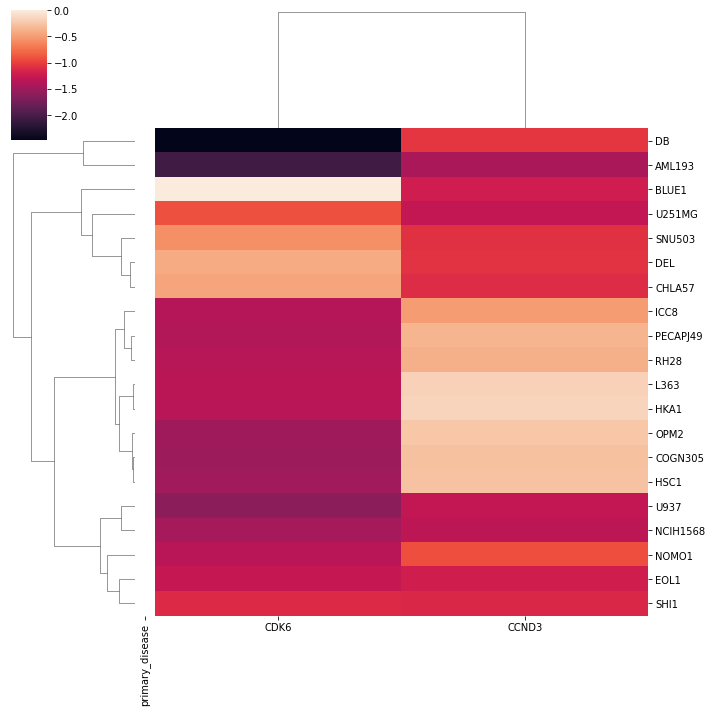

In [576]:
import seaborn as sns
dataz = allGenes[['CDK6','CCND3']]

a = top_cellines['CDK6_CCND3'][0:20]

datay = dataz.index.isin(a)

datay = dataz[datay]
g = sns.clustermap(datay,row_colors=primDis['primary_disease'])
g.savefig('/home/annerer/Dokumente/clustermap_CDK6_CCND3')
g.ax_heatmap.set_xlabel('Driver Genes')
g.ax_heatmap.set_ylabel('Celllines')

#primlist= primDis['primary_disease'].to_list()
lut = dict(zip(pd.unique(top_cellines['CDK6_CCND3']), "rgb"))

row_colors = row_cols.map(lut)
g = sns.clustermap(datay, row_colors=row_colors)

In [481]:
datay = dataz.index.isin(a)
datay = dataz[datay]

In [486]:
prd_list = datay.index.to_list()
primDis = get_prd(prd_list)

In [489]:
primDis

,primary_disease
4,Leukemia
23,Myeloma
40,Bone Cancer
81,Bone Cancer
114,Prostate Cancer
...,...
1394,Sarcoma
1402,Colon/Colorectal Cancer
1430,Bile Duct Cancer
1460,Eye Cancer


In [257]:
data[data['primary_disease'] == 'Bone Cancer']

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
38,ACH-000039,SKNMC,SKNMC,NaN,NaN,Female,ATCC,3.0,-2.627972,Adherent,...,Metastasis,Bone Cancer,Ewings Sarcoma,14.0,SIDM00634,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI
40,ACH-000041,RDES,RDES,NaN,NaN,Male,ATCC,2.0,-2.731637,Mixed adherent and suspension,...,Primary,Bone Cancer,Ewings Sarcoma,19.0,NaN,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI
51,ACH-000052,A673,A673,NaN,684052.0,Female,ATCC,2.0,-2.945665,Adherent,...,Primary,Bone Cancer,Ewings Sarcoma,15.0,SIDM00848,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI
81,ACH-000082,G292CLONEA141B1,G292CLONEA141B1,"G292CLONEA141B1, G-292 clone A141B1",1290807.0,Female,ATCC,2.0,-4.365854,Adherent,...,Primary,Bone Cancer,Osteosarcoma,9.0,SIDM00858,NaN,bone,osteosarcoma,NaN,NaN
86,ACH-000087,SKES1,SKES1,NaN,684072.0,Male,ATCC,2.0,-3.082132,Mixed adherent and suspension,...,Primary,Bone Cancer,Ewings Sarcoma,18.0,SIDM01111,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI
278,ACH-000279,EWS502,EWS502,NaN,NaN,Unknown,Academic lab,2.0,-4.550668,Adherent,...,NaN,Bone Cancer,Ewings Sarcoma,NaN,NaN,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI
363,ACH-000364,U2OS,U2OS,"U2-OS, U-2 OS",909776.0,Female,ATCC,2.0,-3.887180,Adherent,...,Primary,Bone Cancer,Osteosarcoma,15.0,SIDM01191,NaN,bone,osteosarcoma,NaN,NaN
409,ACH-000410,SAOS2,SAOS2,NaN,909707.0,Female,ATCC,2.0,-5.258975,Adherent,...,Primary,Bone Cancer,Osteosarcoma,11.0,SIDM01084,NaN,bone,osteosarcoma,NaN,NaN
423,ACH-000424,TC71,TC71,NaN,1240221.0,Male,DSMZ,2.0,-2.405007,Adherent,...,Primary,Bone Cancer,Ewings Sarcoma,22.0,SIDM00419,NaN,bone,Ewing_sarcoma,NaN,NaN
496,ACH-000499,EW8,EW8,NaN,NaN,Male,Academic lab,2.0,-2.872731,Adherent,...,NaN,Bone Cancer,Ewings Sarcoma,NaN,NaN,NaN,bone,Ewing_sarcoma,NaN,EWS_FLI


In [222]:
get_hypergeometric_p_value(4,764,34,31)

0.043762439503791044

In [186]:
data.shape

(1804, 24)

In [192]:
get_hypergeometric_p_value(5,764,34,31)

0.008586421714816779

In [196]:
# check for enrichment if we have only those celllines in data that are actually in DepMap

In [201]:
depmapgenes = allGenes.index.to_list()
annotatedgenes = data.stripped_cell_line_name.to_list()

len((set(annotatedgenes).intersection(set(depmapgenes))))

764

In [204]:
len(annotatedgenes)

1804

In [209]:
####### this is needed to get any meaningful statistics!
#####

data = data[data.stripped_cell_line_name.isin(depmapgenes)]

###
####
#####

In [25]:
def get_prd(pair):
    boolean_series = data.stripped_cell_line_name.isin(pair)
    prd_df = data[boolean_series]['primary_disease']
    #sub_df = data[boolean_series]['lineage_subtype']

    prd = pd.DataFrame(prd_df)
    #sub = pd.DataFrame(sub_df)
    #return [prd,sub]
    return prd

In [26]:
def get_sub2(pair):
    boolean_series = data.stripped_cell_line_name.isin(pair)
    #prd_df = data[boolean_series]['primary_disease']
    sub_df = data[boolean_series]['lineage_subtype']

    #prd = pd.DataFrame(prd_df)
    sub = pd.DataFrame(sub_df)
    #return [prd,sub]
    return sub

In [17]:
# this is a crime against computing
top_cellines = {}

for _ in uli_list:
    a,b = _
    a_list = mydict[a].index.to_list()
    a_df = pd.DataFrame(a_list)

    b_list = mydict[b].index.to_list()
    b_df = pd.DataFrame(b_list)

    ranked_index = {}
    for _ in a_df.index:
        for j in b_df.index:
            ranked_index[a_df.values[_][0] + '_' + b_df.values[j][0]] = _ + j

    dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
    ceL = [ x for x in range(0,200) for x in dataX[x][0].split('_')]
    ceL = set(ceL)
    ceL = list(ceL)
    top_cellines[a + '_' + b] = ceL
    
    # store the result

## save dictionary (of pairwise spearman ranking) as csv via dataframe, reading the dataframe and converting back to csv


In [18]:
# to save dictionary as csv via dataframe, reading the dataframe and converting back to csv

top_cellines_df = pd.DataFrame.from_dict(top_cellines, orient="index")

top_cellines_df.to_csv("top_cellines.csv")


In [20]:
top_cellines = pd.read_csv("top_cellines.csv", index_col=0)

top_cellines = top_cellines.to_dict("split")
top_cellines = dict(zip(top_cellines["index"], top_cellines["data"]))

### this is in subtypes_primary_diseases

### also of relevance: biological interpretation

## Visualization

In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
import networkx as nx
from scipy.stats import hypergeom

effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/data/sample_info.csv")
# path changed to laptop
#effect = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/Achilles_gene_effect.csv")
#data = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/sample_info.csv")

new_data = data[data.stripped_cell_line_name.isin(allGenes.index)]
new_data.shape
data = new_data


mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes

cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1

a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c
allGenes = effect[effect.columns.intersection(cellL)]

765
1781
765


In [2]:
dep = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/Achilles_gene_dependency.csv")
data = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/sample_info.csv")
# path changed to laptops
#effect = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/Achilles_gene_effect.csv")
#data = pd.read_csv("/home/lannwal/Documents/DepMap_Mining/sample_info.csv")
# to contain them.
mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

dep["INDEX"] = dep.DepMap_ID
dep = dep.set_index('INDEX')
dep = dep.rename(index=mapping)
dep = dep.drop("DepMap_ID",1)


gene1 = dep.columns.to_list()
# split at space
for i in range(len(gene1)):
    gene1[i] = gene1[i].split(" ") 

genes1 = []
for i in range(len(gene1)):
    genes1.append(gene[i][0])

dep.columns = genes

cellLine1 = dep.index.to_list()
# split at space
for i in range(len(cellLine1)):
    cellLine1[i] = cellLine1[i].split("_") 

cellLines1 = []
for i in range(len(cellLine1)):
    cellLines1.append(cellLine1[i][0])

dep.index = cellLines1

cellLine1 = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine1)):
    cellLine1[i] = cellLine1[i].split("_") 

cellLines1 = []
for i in range(len(cellLine1)):
    cellLines1.append(cellLine1[i][0])
    
data['CCLE_Name'] = cellLines1

a = set(cellLines1)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c

allDep = dep[dep.columns.intersection(cellL)]

1781
1781
1781


In [28]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [108]:
def get_prd_and_sub(pair):
    boolean_series = data.stripped_cell_line_name.isin(pair[0])
    prd_df = data[boolean_series]['primary_disease']
    sub_df = data[boolean_series]['lineage_subtype']

    prd = pd.DataFrame(prd_df)
    sub = pd.DataFrame(sub_df)
    return [prd,sub]

## LOOKING FOR ENRICHMENT IN THE TOP CORRELATIONS

In [ ]:
new_data = data[data.stripped_cell_line_name.isin(allGenes.index)]
new_data.shape
data = new_data

In [2]:
import pandas as pd

In [16]:
pccdata = pd.read_csv('/home/annerer/Downloads/PCC_cutoff2.txt',sep="\t")

In [34]:
pccdata.head()

,line,A,B,PCC
0,0,MDM2,TP53,-0.696747
1,1,MDM2,TP53BP1,-0.629534
2,2,PPM1D,TP53,-0.586922
3,3,ATM,MDM2,-0.533031
4,4,CHEK2,MDM2,-0.522001


In [33]:
pccdata.tail()

,line,A,B,PCC
50308,164140016,SUPT20H,TADA2B,0.854789
50309,164140017,TADA2B,TAF5L,0.866306
50310,164140018,TADA1,TAF5L,0.875483
50311,164140019,SUPT20H,TAF5L,0.889404
50312,164140020,TSC1,TSC2,0.923451


In [ ]:
def clank70(list_of_pairs):
    top_ce = {}
    for _ in list_of_pairs:
        a,b = _
        a_list = rankings[a].index.to_list()
        a_df = pd.DataFrame(a_list)

        b_list = rankings[b].index.to_list()
        b_df = pd.DataFrame(b_list)

        ranked_index = pd.concat([a_df,b_df]).sort_index().reset_index(drop=True)
        top_ce[a + '_' + b] = ranked_index[0].to_list()[0:70]
    return top_ce

In [23]:
def print_PRIMARY_DISEASES(clank_lines,number_of_celllines,enrichfor='primary_disease'):
    results = {}
    i = 0
    for _ in clank_lines.keys():
        temp = get_prd(clank_lines[_])
        temp = temp[enrichfor].value_counts()
        print(_)
        for j in range(len(temp)):
            value_count = temp[j]
            dissease = temp.index[j]
            if get_hypergeometric_p_value(value_count,764,total_occurence(dissease),number_of_celllines) < 0.05:
                print(dissease)
                print(get_hypergeometric_p_value(value_count,764,total_occurence(dissease),number_of_celllines))
                results[i] = [_,dissease,get_hypergeometric_p_value(value_count,764,total_occurence(dissease),number_of_celllines)]
                i += 1
        print('\n')
    return results

In [22]:
def total_occurence(x,what='primary_disease'):
    temp = data[data[what] == x]
    return temp.shape[0]

In [ ]:

# as done at home, maybe just paste it an run it on pccdata
rankings = {}
for _ in range(len(ranking.index)):
    if ranking[ranking.index[_]] > 0:
        rankings[ranking.index[_]] = allGenes[ranking.index[_]].sort_values(ascending=False)
    else:
        rankings[ranking.index[_]] = allGenes[ranking.index[_]].sort_values()

In [29]:
pccdata.shape

(50313, 4)

In [30]:
def get_prd(pair):
    boolean_series = data.stripped_cell_line_name.isin(pair)
    prd_df = data[boolean_series]['primary_disease']
    #sub_df = data[boolean_series]['lineage_subtype']

    prd = pd.DataFrame(prd_df)
    #sub = pd.DataFrame(sub_df)
    #return [prd,sub]
    return prd

In [31]:
def get_hypergeometric_p_value(count,totalCount,N,sample_size):
    count = count - 1
    pval = hypergeom.sf(count, totalCount, N,sample_size)
 #  (x-1,783,totalhits,20)
    return pval

In [35]:
# validate against random pairs and random orientations.
# should work extremely well from the looks of it. 
# this would show we can, by basing cutoffs on literature,
# classify the role of cancer genes and use it to rank, enrich 
# for relevant diseases in an pairwise/co-essentiality space